In [16]:
%matplotlib inline
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageOps
from collections import Counter
import numpy as np
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import patches

fontprop = fm.FontProperties(fname='../NanumBarunGothic.ttf', size=18)

In [2]:
def read_json(filename):
    with Path(filename).open(encoding='utf8') as handle:
        ann = json.load(handle)
    return ann

In [3]:
# gt file과 raw image file path를 이용해 데이터를 불러온다. 아래 경로는 예시.
# data = read_json("../input/data/ICDAR17_Korean/ufo/train.json")
data = read_json("../input/data/camper/annotation.json")

In [4]:
dic_image=data['images']

In [9]:
# path_imgs='../input/data/ICDAR17_Korean/images/'
path_imgs='../input/data/camper/images/'

In [10]:
# 그래프를 노트북 안에 그리기 위해 설정

# # 필요한 패키지와 라이브러리를 가져옴
# import matplotlib as mpl

# # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# mpl.rcParams['axes.unicode_minus'] = False

In [18]:
start_idx=6
end_idx=100

start check 20181012_181505.jpg....
주문전화_KO_Horizontal
1588-8655_Others_Horizontal
ulmuone_EN_Horizontal
는_KO_Horizontal
샘물_KO_Horizontal
부드럽고_KO_Horizontal
개운한_KO_Horizontal
맛_KO_Horizontal
이득_KO_Irregular
미니배너_KO_Irregular
이득_KO_Irregular
미니배너_KO_Irregular
프린트_KO_Horizontal
1+1_Others_Horizontal
5000원만_KO_Horizontal
추가하면_KO_Horizontal
미니배너가_KO_Horizontal
2개라늬!!!_KO_Horizontal
출력비_KO_Horizontal
풀무원샘물_KO_Horizontal
중구가맹점_KO_Horizontal
010-4234-6316_Others_Horizontal
적용예정_KO_Horizontal
3,000원_KO_Horizontal
:_Others_Horizontal
미니배너대_KO_Horizontal
5,000원_KO_Horizontal
145x420mm_Others_Horizontal
PRINT_EN_Horizontal
RHYME_EN_Horizontal
프린트_KO_Horizontal
라임_KO_Horizontal
넉한_KO_Horizontal
크기의_KO_Horizontal
미니배너로_KO_Horizontal
디자인을_KO_Horizontal
더_KO_Horizontal
크게,_KO_Horizontal
더_KO_Horizontal
많이,_KO_Horizontal
넣어보세요!_KO_Horizontal
200x440mm_Others_Horizontal
력비_KO_Horizontal
:_Others_Horizontal
3,000원_KO_Horizontal
니배너대_KO_Horizontal
5,000원_KO_Horizontal
PRINT_EN_Horizontal
RHYME_EN_Horizon

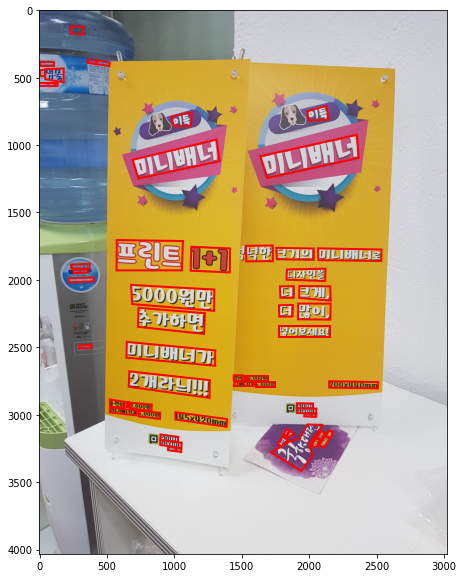

Index : 6 // 검토필요 목록 추가(y/n): ㅁㅈㄴㅇ


Stop Check


In [20]:
check_list=[]
list_img=list(dic_image.keys())

for idx, path_img in enumerate(list_img[start_idx:end_idx]):
    print(f'start check {path_img}....')
    # command = input("continue?(y/n):")
    # if command == 'n':
    #     break
    img=Image.open(f"{path_imgs}{path_img}")
    img = ImageOps.exif_transpose(img)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(img)


    for i in dic_image[path_img]['words']:
        dic_img=dic_image[path_img]['words'][i]
        ax.add_patch(
            patches.Polygon(
                dic_img['points'],
                fill=False,
                color='r',
                linewidth=2
            ),
        )
        if dic_img['language'] == None:
            img_trans="None"
        else:
            img_lang = dic_img['language'][-1]
            
        dix_img_text=dic_img['transcription']+'_'+img_lang+'_'+dic_img['orientation']
        print(dix_img_text)
        # ax.text(dic_img['points'][0][0],
        #         dic_img['points'][0][1],
        #         dix_img_text,
        #         fontproperties=fontprop,
        #         color='b',)
    plt.show()
    
    isCorrect = input(f"Index : {start_idx + idx} // 검토필요 목록 추가(y/n):")
    if isCorrect == 'y':
        check_list.append(path_img)
        print("check list 추가")
        continue
    elif isCorrect == 'n':
        continue
    else:
        break
print("="*30)
print("Stop Check")